# Segmenting and Clustering Neighborhoods in Toronto
## Week 3 assignment

< First part of the assignment >

In [3]:
!pip install folium
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=8f8ad147f14cc7d8ab2a2b909eb7d5446bcb8d3150cce60487c407595b2be893
  Stored in directory: c:\users\cho\appdata\local\pip\cache\wheels\0a\9e\ba\20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [4]:
import pandas as pd
import numpy as np
import requests
import folium

from bs4 import BeautifulSoup

### Import the location data from the wikipedia page

In [5]:
url= 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html=requests.get(url).text

### Process the cells that have an assigned borough. Ignore the 'not assigned' cells

In [6]:
soup = BeautifulSoup(html)
table_contents=[]
table = soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

df.head(12)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### Number of rows and columns in the data frame 'df'

In [7]:
df.shape

(103, 3)

==========================================\
< Second part of the assignment >

### Import location data attached to the postal code

In [8]:
locgeo_df = pd.read_csv('https://cocl.us/Geospatial_data', index_col='Postal Code')
locgeo_df.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


### Join (Postal code, borough, neighborhood) and (latitude, longitude) data. 
'Postal Code' column in 'locgeo_df' frame is dropped.

In [9]:
toronto_data = df.join(locgeo_df, on='PostalCode')
toronto_data.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


=============================================\
< Third part of the assignment >

### Display the map

In [10]:
latitude = toronto_data['Latitude'].values.tolist()[0]
longitude = toronto_data['Longitude'].values.tolist()[0]

map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### If the map is not shown in the github link
1. It can be seen on 'https://nbviewer.jupyter.org/' with my github link 'https://github.com/yujincho1/Coursera_Capstone/blob/main/Toronto_map.ipynb'
2. Here is the screen-capture of the image that I generated with folium

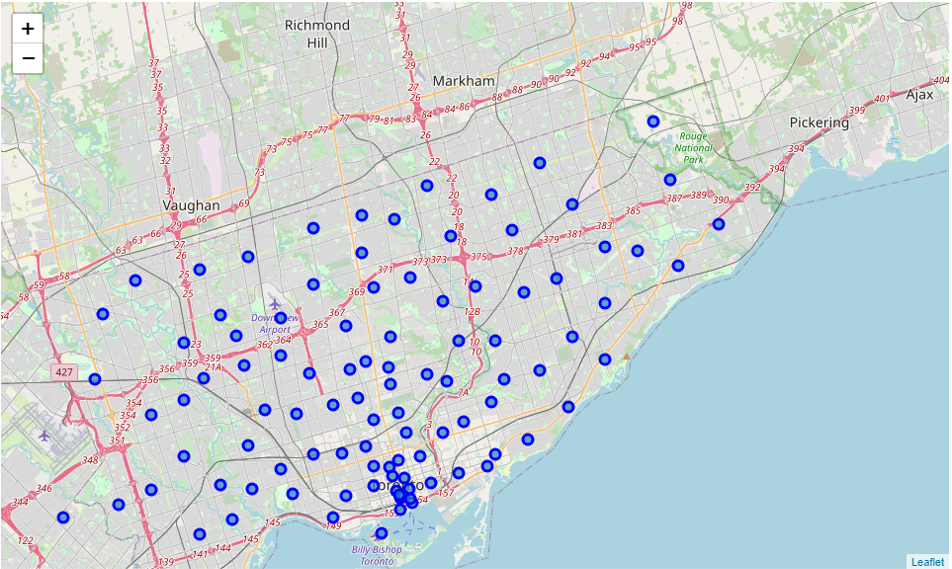

In [11]:
from IPython.display import Image
Image("Toronto_map.png")